In [23]:
## import required libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf
from tensorflow import feature_column


In [24]:
## load dataset
dftrain = pd.read_csv('/Users/aditi/Downloads/titanic_train.csv') #trainig data to create the model.
dftest = pd.read_csv('/Users/aditi/Downloads/titanic_test.csv')  #testing data to evaluate & make sure that it's working properly.
y_train = dftrain.pop('survived')
y_test = dftest.pop('survived')


In [25]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [26]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64


In [27]:
print(dftrain.loc[0], y_train.loc[0])

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [28]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [29]:
dftrain.shape

(627, 9)

In [30]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<AxesSubplot:>

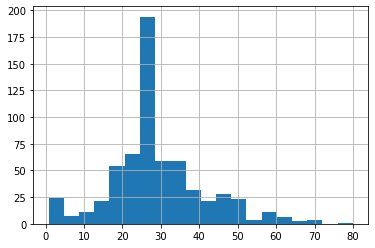

In [31]:
## graph of data
dftrain.age.hist(bins=20)

<AxesSubplot:>

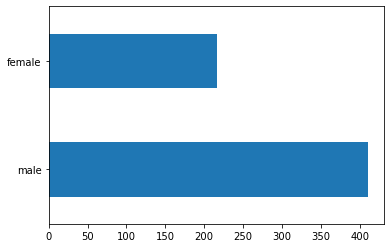

In [32]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

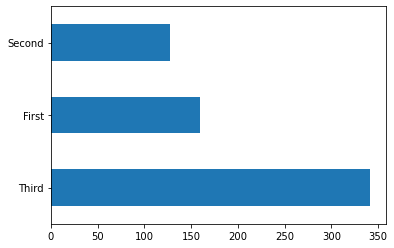

In [33]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% srvive')

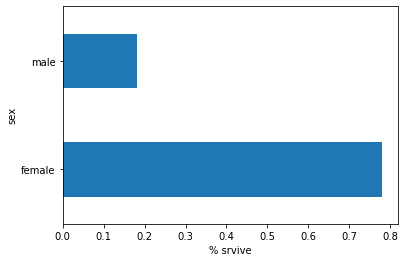

In [34]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% srvive')

In [35]:
dftest.shape

(264, 9)

In [36]:
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [42]:
feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets a list of all unique values from giveb feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
    
print(feature_columns)    

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [44]:
dftrain[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

In [50]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function(): #inner function,this will be returned.
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) #create tf.data.dataset object with data  and its label
    if shuffle: 
      ds = ds.shuffle(1000) #randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs) #split dataset into batches of 32 nd repeat process for number of epochs
    return ds #return a batch of the dataset
  return input_function #return a function object for use

train_input_fn = make_input_fn(dftrain, y_train) #here we will call the input_function that was returned to us to get a dataset object we can feeg to the model.
test_input_fn = make_input_fn(dftest, y_test, num_epochs=1, shuffle=False)

In [51]:
#creating the model:we are going to use a linear estimator to utilize the linear algorithm.
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(test_input_fn) #get model metrics/stats by testing on testing data

clear_output() #clears console output
print(result['accuracy']) #the result variable is simply a dict of stats about our model
print(result)

0.77272725
{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.8334864, 'auc_precision_recall': 0.78955907, 'average_loss': 0.4861916, 'label/mean': 0.375, 'loss': 0.47716272, 'precision': 0.7294118, 'prediction/mean': 0.3290723, 'recall': 0.6262626, 'global_step': 200}


In [52]:
result= list(linear_est.predict(test_input_fn))
print(dftest.loc[4])
print(y_test.loc[4])
print(result[4]['probabilities'][1])

INFO:tensorflow:Calling model_fn.


/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/y2/n4q_rwcd73x83326wd6szdh80000gn/T/tmp7kxw950h/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
1
0.2249909
